In [2]:
import pickle
import numpy as np

In [3]:
with open("train_qa.txt","rb") as fp:
    train_data=pickle.load(fp)

In [4]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [5]:
with open("test_qa.txt","rb") as fp:
    test_data=pickle.load(fp)

In [6]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [7]:
type(test_data)

list

In [8]:
type(train_data)

list

In [9]:
len(test_data)

1000

In [10]:
len(train_data)

10000

In [11]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [12]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [13]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [14]:
train_data[0][2]

'no'

# NLP

In [ ]:
# set up vocabulary
vocab=set()

In [16]:
all_data=test_data+train_data

In [17]:
type(all_data)

list

In [18]:
#will only contain distinct words
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [19]:
vocab.add('yes')
vocab.add('no')

In [20]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [21]:
len(vocab)

37

In [22]:
vocab_len=len(vocab)+1

In [23]:
#data 0 will give story
#data 1 will give question
#data 2 will give answer
for data in all_data:
    print(data)
    print("\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
max_story_len=max([len(data[0]) for data in all_data])
max_story_len

156

In [25]:
max_question_len=max([len(data[1]) for data in all_data])
max_question_len

6

In [26]:
#vectorize data- convert data into numerical form
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [27]:
pip install keras.preprocessing.sequence


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.preprocessing.sequence (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.sequence


In [27]:
#to characterize we need keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [28]:
tokenizer=Tokenizer(filters=[])

In [29]:
tokenizer.fit_on_texts(vocab)

In [30]:
tokenizer.word_index

{'sandra': 1,
 'went': 2,
 'down': 3,
 'grabbed': 4,
 '?': 5,
 'up': 6,
 'discarded': 7,
 'football': 8,
 'is': 9,
 'there': 10,
 'journeyed': 11,
 'bathroom': 12,
 'travelled': 13,
 'yes': 14,
 'no': 15,
 'back': 16,
 'took': 17,
 'hallway': 18,
 'mary': 19,
 'kitchen': 20,
 'put': 21,
 'john': 22,
 'bedroom': 23,
 'daniel': 24,
 'moved': 25,
 'office': 26,
 'dropped': 27,
 '.': 28,
 'left': 29,
 'to': 30,
 'in': 31,
 'apple': 32,
 'garden': 33,
 'picked': 34,
 'milk': 35,
 'the': 36,
 'got': 37}

In [31]:
train_story_text=[]
train_question_text=[]
train_answers=[]

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [32]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [33]:
len(train_story_text)

10000

In [34]:
len(train_story_seq)

10000

In [35]:
train_story_seq

[[19, 25, 30, 36, 12, 28, 1, 11, 30, 36, 23, 28],
 [19,
  25,
  30,
  36,
  12,
  28,
  1,
  11,
  30,
  36,
  23,
  28,
  19,
  2,
  16,
  30,
  36,
  23,
  28,
  24,
  2,
  16,
  30,
  36,
  18,
  28],
 [19,
  25,
  30,
  36,
  12,
  28,
  1,
  11,
  30,
  36,
  23,
  28,
  19,
  2,
  16,
  30,
  36,
  23,
  28,
  24,
  2,
  16,
  30,
  36,
  18,
  28,
  1,
  2,
  30,
  36,
  20,
  28,
  24,
  2,
  16,
  30,
  36,
  12,
  28],
 [19,
  25,
  30,
  36,
  12,
  28,
  1,
  11,
  30,
  36,
  23,
  28,
  19,
  2,
  16,
  30,
  36,
  23,
  28,
  24,
  2,
  16,
  30,
  36,
  18,
  28,
  1,
  2,
  30,
  36,
  20,
  28,
  24,
  2,
  16,
  30,
  36,
  12,
  28,
  24,
  34,
  6,
  36,
  8,
  10,
  28,
  24,
  2,
  30,
  36,
  23,
  28],
 [19,
  25,
  30,
  36,
  12,
  28,
  1,
  11,
  30,
  36,
  23,
  28,
  19,
  2,
  16,
  30,
  36,
  23,
  28,
  24,
  2,
  16,
  30,
  36,
  18,
  28,
  1,
  2,
  30,
  36,
  20,
  28,
  24,
  2,
  16,
  30,
  36,
  12,
  28,
  24,
  34,
  6,
  36,
  8,
  10,
 

In [36]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [42]:
#functionalize the vectorization
def vectorize_stories(data, word_index=tokenizer.word_index,
                     max_story_len=max_story_len,max_question_len=max_question_len):
    X=[] #stories
    Xq=[] #query/question
    Y=[] #correct answer
    for story, query, answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return(pad_sequences(X, maxlen=max_story_len),
           pad_sequences(Xq, maxlen=max_question_len),
           np.array(Y))
    

In [43]:
inputs_train, queries_train, answers_train=vectorize_stories(train_data)

In [44]:
inputs_test, queries_test, answers_test=vectorize_stories(test_data)

In [45]:
inputs_train

array([[ 0,  0,  0, ..., 36, 23, 28],
       [ 0,  0,  0, ..., 36, 18, 28],
       [ 0,  0,  0, ..., 36, 12, 28],
       ...,
       [ 0,  0,  0, ..., 36, 23, 28],
       [ 0,  0,  0, ..., 35, 10, 28],
       [ 0,  0,  0, ..., 32, 10, 28]])

In [46]:
queries_test

array([[ 9, 22, 31, 36, 20,  5],
       [ 9, 22, 31, 36, 20,  5],
       [ 9, 22, 31, 36, 33,  5],
       ...,
       [ 9, 19, 31, 36, 23,  5],
       [ 9,  1, 31, 36, 33,  5],
       [ 9, 19, 31, 36, 33,  5]])

In [47]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
inputs_test

array([[ 0,  0,  0, ..., 36, 23, 28],
       [ 0,  0,  0, ..., 36, 33, 28],
       [ 0,  0,  0, ..., 36, 33, 28],
       ...,
       [ 0,  0,  0, ..., 36, 32, 28],
       [ 0,  0,  0, ..., 36, 33, 28],
       [ 0,  0,  0, ..., 32, 10, 28]])

In [49]:
tokenizer.word_index['yes']

14

In [50]:
tokenizer.word_index['no']

15

In [57]:
#creating the model

In [66]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [68]:
input_sequence = Input((max_story_len,))
question=Input((max_question_len,))

In [69]:
# Input encoder m
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [78]:
# Input encoder c
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [79]:
# question encoder
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [80]:
# Encode the sequences
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [81]:
match=dot([input_encoded_m, question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [82]:
response=add([match,input_encoded_c ])
response=Permute((2,1))(response)

In [83]:
#concatenate
answer=concatenate([response,question_encoded])

In [84]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [85]:
answer=LSTM(32)(answer)

In [86]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [87]:
answer=Activation('softmax')(answer)

In [89]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_2[0][0]']             
                                                                                                  
 sequential_4 (Sequential)   (None, 6, 64)                2432      ['input_3[0][0]']             
                                                                                            

In [92]:
history=model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=20,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/20


313/313 [==============================] - 9s 16ms/step - loss: 0.8979 - accuracy: 0.4986 - val_loss: 0.6952 - val_accuracy: 0.5030
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7086 - accuracy: 0.4915 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6982 - accuracy: 0.4955 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6962 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6963 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6951 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6945 - accuracy: 0.5078 - val_loss: 0.6932 - val_accuracy: 0.50

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

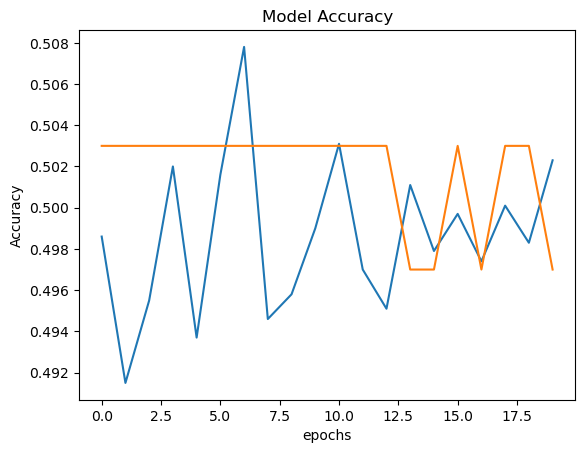

In [96]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")


In [97]:
#save
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets


In [98]:
# evaluation on the test set
model.load_weights("chatbot_model")

In [99]:
pred_results=model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 4ms/step


In [100]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [118]:
story=' '.join(word for word in test_data[23][0])

In [119]:
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [120]:
query=' '.join(word for word in test_data[23][1])

In [121]:
query

'Is Sandra in the bedroom ?'

In [122]:
test_data[23][2]

'no'

In [123]:
val_max=np.argmax(pred_results[23])
for key, val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted answer is" ,k)
print("Probability of certainity", pred_results[23][val_max])

Predicted answer is yes
Probability of certainity 0.54261065


In [124]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [125]:
# creating story by ourself
story="Mary dropped the football . Sandra discarded apple in kitchen"
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [133]:
my_question = "Is Sandra in the kitchen ? "

In [134]:
my_question.split()

['Is', 'Sandra', 'in', 'the', 'kitchen', '?']

In [135]:
mydata =[(story.split(),my_question.split(),'yes')]

In [136]:
my_story,my_ques, my_ans=vectorize_stories(mydata)

In [137]:
pred_results=model.predict(([my_story,my_ques]))

1/1 [==============================] - 0s 30ms/step


In [138]:
val_max=np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted answer is" ,k)
print("Probability of certainity", pred_results[0][val_max])

Predicted answer is yes
Probability of certainity 0.54229003
